<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/Clase_3%20Medidas%20de%20tendencia%20central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MEDIA
Es la suma de los datos sobre el numero de datos

#MEDIANA
Es el dato de la mitad

In [1]:
!pip install statsmodels

In [2]:
!pip install wquantiles

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
state = pd.read_csv("/content/state.csv")
#Ver los 5 registros
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [18]:
state["Murder.Rate"].head()

,Murder.Rate
0,5.7
1,5.6
2,4.7
3,5.6
4,4.4


In [19]:
#Ver 5 ultimos
state.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [20]:
state.sample(6)

,State,Population,Murder.Rate,Abbreviation
37,Pennsylvania,12702379,4.8,PA
12,Illinois,12830632,5.3,IL
22,Minnesota,5303925,1.6,MN
35,Oklahoma,3751351,4.5,OK
38,Rhode Island,1052567,2.4,RI
45,Virginia,8001024,4.1,VA


In [21]:
#Extraer n datos aleatorios
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


## 2. Overview de los datos
Analizar las columnas presentes en el df

In [23]:
state.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [25]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [26]:
#Medida de tencencia central
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2.1 Estimar las talas de poblacion y asesinatos

In [28]:
state.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [29]:
state["Population"].mean()

np.float64(6162876.3)

In [30]:
state["Population"].median()

4436369.5

In [31]:
#Media trucada
trim_mean(state["Population"],0.1)

np.float64(4783697.125)

In [ ]:
#Media
state["Murder.Rate"]

In [32]:
#Media ponderada
np.average(state["Murder.Rate"], weights=state["Population"])

np.float64(4.445833981123393)

<Axes: >

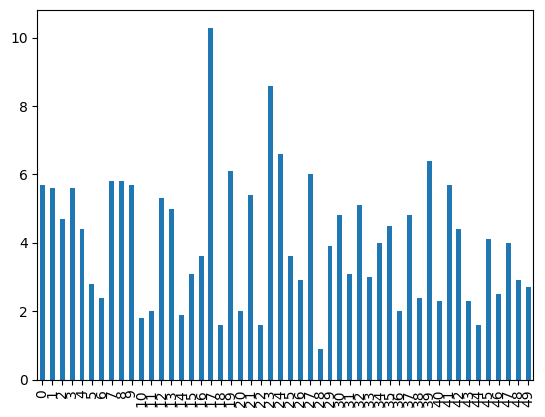

In [34]:
state["Murder.Rate"].plot.bar()

<Axes: >

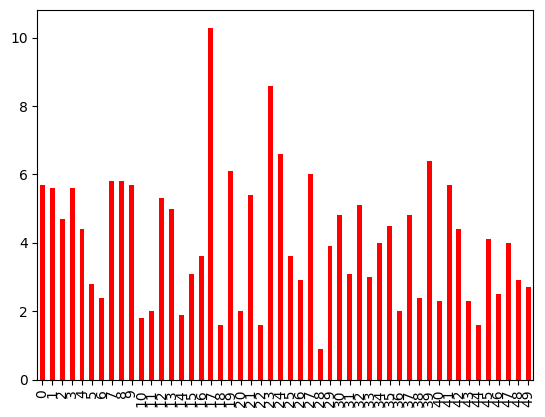

In [35]:
state["Murder.Rate"].plot.bar(color='red')

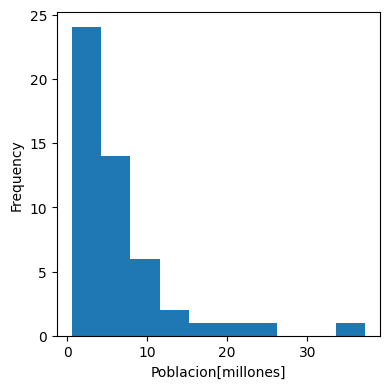

In [37]:
ax=(state["Population"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Poblacion[millones]")
plt.tight_layout()
plt.show()

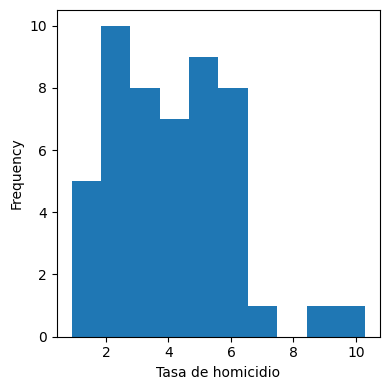

In [45]:
ax=(state["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de homicidio")
plt.tight_layout()
plt.show()

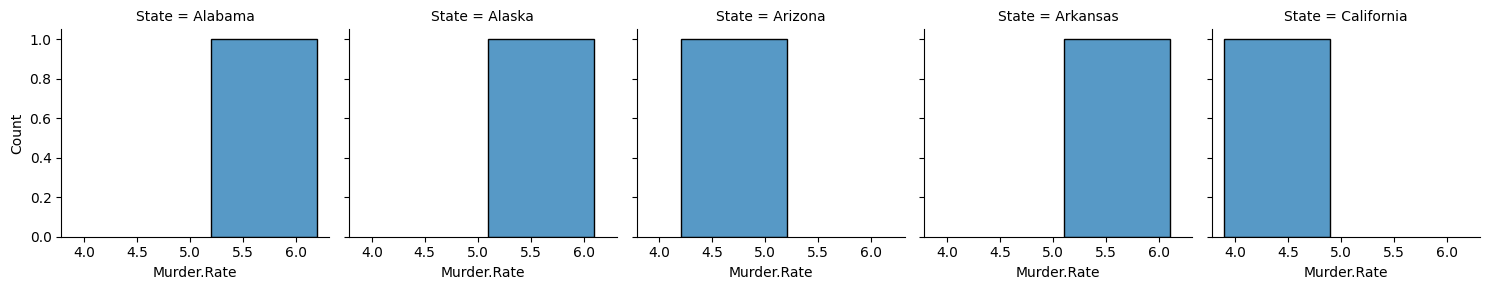

In [50]:
analisis=state.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.histplot,"Murder.Rate")